In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pythonafroz_solar_panel_images_path = kagglehub.dataset_download('pythonafroz/solar-panel-images')

print('Data source import complete.')


100%|██████████| 305M/305M [00:05<00:00, 55.2MB/s]

Extracting files...


Data source import complete.


<div style="color:white;background-color:#e90045;padding:3%;border-radius:150px 150px;font-size:3em;text-align:center">Solar Panel Image Classification using VGG16</div>

![](https://wallpapercave.com/wp/wp4041905.jpg)

<a id="1"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Objective of this project 📊📈</span>

**The accumulation of dust, snow, bird drops etc. on the surface of solar panels reduces the efficiency of the solar modules and hence the amount of produced energy. Monitoring and cleaning solar panels is a crucial task, hence developing an optimal procedure to monitor and clean these panels is very important in order to increase modules efficiency, reduce maintenance cost and reducing the use of resources.**

**The objective of this project is to investigate the ability of different machine learning classifiers to detect dust, snow, bird drops, physical and electrical on solar panel surfaces with the highest possible accuracy.**

<a id="2"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC; ">Factors that can cause a reduction in power generation from solar panels 📊📈</span>

<font color='Red'>
    
**Here are the effects of dirt, debris, snow, bird drop, mechanical damage and electrical damage on solar panels:**

<font color='Blue'>
    
1. *Dirt and debris: Dirt and debris can block sunlight from reaching the solar panel, which will reduce the amount of electricity that is generated. It is important to clean solar panels regularly to remove any dirt or debris that has accumulated.*
    
2. *Snow: Snow can also block sunlight from reaching the solar panel, but it will usually melt off on its own during the day. If there is a lot of snow, it may be necessary to remove it manually.*
    
3. *Bird droppings: Bird droppings can be acidic and can damage the surface of the solar panel. It is important to clean bird droppings off of solar panels as soon as possible.*
    
3. *Mechanical damage: Solar panels can be damaged by hail, wind, or other objects. If a solar panel is damaged, it will need to be repaired or replaced.*
    
4. *Electrical damage: Solar panels can be damaged by lightning strikes or other electrical surges. If a solar panel is damaged by electrical damage, it will need to be repaired or replaced.*

<font color='Red'>



<a id="4"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Deep learning & Solar Panel fault classification 📊📈</span>

<font color='Red'>

1. **Deep learning can be used to classify different types of faults. This is because deep learning models can learn to distinguish between different types of patterns. For example, a deep learning model could be trained to distinguish between the patterns of a cracked panel, a dirty panel, a burned-out panel, bird dropping on solar panel and snow cover on solar panel.**

2. **Deep learning can be used to localize faults. This is because deep learning models can learn to identify the location of a fault within a solar panel. For example, a deep learning model could be trained to identify the location of a cracked panel within a solar plant.**

4. **Deep learning is a powerful tool that can be used to improve the efficiency and reliability of solar panel systems. By identifying and localizing faults early on, deep learning can help to prevent costly repairs and downtime.**

<font color='Green'>
    
**Here are some of the benefits of using deep learning for solar panel fault detection:**

1. **Accuracy: Deep learning models can achieve high accuracy in detecting faults, even in cases where human inspectors may miss them.**

2. **Speed: Deep learning models can quickly scan large amounts of data to identify potential faults.**

3. **Scalability: Deep learning models can be easily scaled to handle larger and more complex datasets.**

4. **Cost-effectiveness: Deep learning models can be used to automate the fault detection process, which can save money on labor costs.**

<font color='Brown'>    
    
**Overall, deep learning is a promising technology that has the potential to revolutionize solar panel fault detection. By automating the process and improving accuracy, deep learning can help to improve the efficiency and reliability of solar panel systems.**

<a id="5"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">About Dataset 📊📈</span>

**This directory contains six different class folders to classify between. Since the images were scraped from the internet, there is a slight imbalance in the number of images collected.**


<font color='Brown'>   
    

1. Clean: This directory has images of clean solar panels
2. Dusty: This directory has images of dusty solar panels
3. Bird-drop: This directory has images of bird-drop on solar panels

4. Electrical-damage: This directory has images of electrical-damage solar panels

5. Physical-Damage: This directory has images of physical-damage solar panels

6. Snow-Covered: This directory has images of snow-covered on solar panels

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import shutil

new_path = '/root/.cache/kagglehub/datasets/pythonafroz/solar-panel-images/versions/2/Faulty_solar_panel/Bird-drop/New'
bird_drop_path = '/root/.cache/kagglehub/datasets/pythonafroz/solar-panel-images/versions/2/Faulty_solar_panel/Bird-drop'

for file_name in os.listdir(new_path):
    shutil.move(os.path.join(new_path, file_name), bird_drop_path)

os.rmdir(new_path)  # Remove the empty subfolder


In [ ]:
img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/root/.cache/kagglehub/datasets/pythonafroz/solar-panel-images/versions/2/Faulty_solar_panel',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/root/.cache/kagglehub/datasets/pythonafroz/solar-panel-images/versions/2/Faulty_solar_panel',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True)


Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [ ]:
class_names = train_ds.class_names
print(f"Classes detected: {class_names}")

Classes detected: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

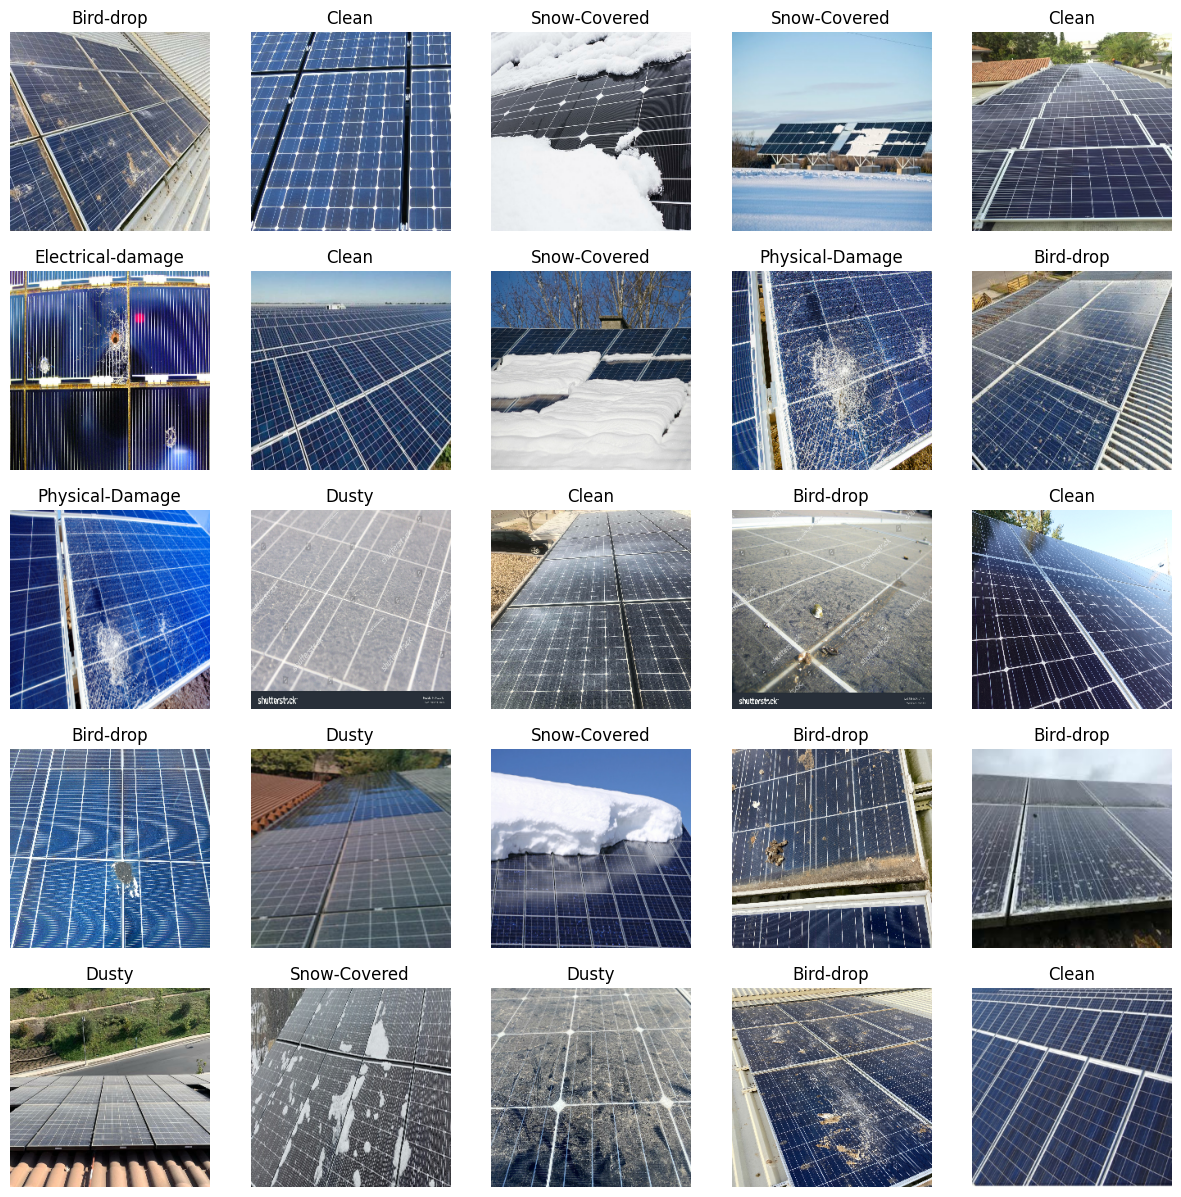

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id="6"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">VGG16📊📈</span>

VGG16 is a convolutional neural network (CNN) that is widely used for image classification. It was first introduced in 2014 by the Visual Geometry Group (VGG) at the University of Oxford. VGG16 is a deep network, with 16 layers, and it has been shown to be very effective at image classification. It has achieved state-of-the-art results on a number of benchmark datasets, including ImageNet.

VGG16 is a popular choice for image classification because it is:

1.	Versatile: VGG16 can be used for a variety of image classification tasks, including object detection, scene classification, and person identification.
2.	Accurate: VGG16 has been shown to be very accurate at image classification, achieving state-of-the-art results on a number of benchmark datasets.
3.	Efficient: VGG16 is relatively efficient, making it a good choice for real-time applications.

Here are some of the reasons why we use VGG16:

1.	Accuracy: VGG16 has been shown to be very accurate at image classification, achieving state-of-the-art results on a number of benchmark datasets. For example, on the ImageNet dataset, VGG16 achieves an accuracy of 92.7%.
2.	Transfer learning: VGG16 can be used for transfer learning, which is a technique that allows us to use a pre-trained model to improve the performance of a new model. Transfer learning is often used when we have a small dataset for our new model.
3.	Ease of use: VGG16 is available in many deep learning frameworks, such as Keras and TensorFlow. This makes it easy to use for image classification tasks.

Overall, VGG16 is a powerful and versatile CNN that is widely used for image classification. It is accurate, efficient, and easy to use.

![](https://storage.googleapis.com/lds-media/images/vgg16-architecture.original.jpg)

<a id="7"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transfer learning & VGG16📊📈</span>

Transfer learning is a machine learning technique where a model trained on one task is reused as the starting point for a model on a second task. This can be useful when there is limited data available for the second task, or when the two tasks are related in some way.

VGG16 is a convolutional neural network (CNN) that was trained on the ImageNet dataset, which contains over 14 million images and 1000 different classes. VGG16 is a very powerful model, and it can achieve state-of-the-art results on a variety of image classification tasks.

To use transfer learning with VGG16, we can start by loading the pre-trained model from a Keras library. We can then freeze the weights of the first few layers of the model, and train the last few layers on our own dataset. This allows us to take advantage of the knowledge that VGG16 has learned on the ImageNet dataset, while still being able to fine-tune the model to our specific task.

Transfer learning with VGG16 can be a very effective way to build a machine learning model when there is limited data available. It can also be used to improve the performance of a model when there is a lot of data available, but the data is noisy or imbalanced.

Here are some of the advantages of using transfer learning with VGG16:

1.	Reduces the amount of training data required. VGG16 has been trained on a massive dataset, so it already has a good understanding of the general features of images. This means that we can train a model on a smaller dataset, which can save time and resources.
2.	Improves the performance of the model. By fine-tuning the last few layers of VGG16 on our own dataset, we can improve the model's performance on our specific task.
3.	Is relatively easy to implement. There are many tutorials available that show how to use transfer learning with VGG16.

Here are some of the disadvantages of using transfer learning with VGG16:

4.	May not be effective if the data is very different from the data that VGG16 was trained on. If the data is very different from the data that VGG16 was trained on, then transfer learning may not be effective. In this case, it may be better to train a model from scratch.
5.	May not be able to achieve state-of-the-art results. Transfer learning is a powerful technique, but it may not be able to achieve state-of-the-art results on all tasks. If you need to achieve the best possible results, then you may need to train a model from scratch.

Overall, transfer learning with VGG16 is a powerful technique that can be used to build machine learning models when there is limited data available. It can also be used to improve the performance of a model when there is a lot of data available, but the data is noisy or imbalanced

![](https://www.researchgate.net/profile/Amir-Mosavi-3/publication/334992074/figure/fig2/AS:788879695179776@1565094984739/VGG-16-model-Illustration-of-using-the-VGG-16-for-transfer-learning-The-convolution.png)

<a id="8"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">VGG16 and its limitations📊📈</span>

VGG16 has a number of limitations, including:

1.	Computational complexity: VGG16 is a very computationally expensive model to train and deploy. It has a large number of parameters, which requires a lot of data and computation to train. This can make it difficult to use VGG16 on resource-constrained devices, such as mobile phones or embedded systems.
2.	Vanishing gradients: VGG16 is prone to the vanishing gradient problem, which can make it difficult to train the model to convergence. This is because the model has a very deep architecture, which can cause the gradients to become very small as they propagate through the network.
3.	Overfitting: VGG16 is prone to overfitting, which can lead to poor performance on unseen data. This is because the model has a large number of parameters, which can make it difficult to generalize to new data.
4.	Data requirements: VGG16 requires a large amount of training data to achieve good performance. This can be a challenge, especially for tasks such as object detection and segmentation, which require a large variety of object classes.

**Despite these limitations, VGG16 remains a popular model for image classification tasks. It has achieved state-of-the-art results on a number of benchmark datasets, and it is often used as a baseline for other image classification models. However, it is important to be aware of the limitations of VGG16 when using it for real-world applications.**

<a id="9"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Ways to overcome the limitations of VGG16📊📈</span>

Here are some of the ways to overcome the limitations of VGG16:

1.	Data augmentation: Data augmentation can be used to increase the size of the training dataset and reduce overfitting. This can be done by creating new training examples by applying transformations to the existing data, such as cropping, flipping, and rotating images.
2.	Regularization: Regularization techniques can be used to prevent the model from overfitting. This can be done by adding a penalty to the loss function that penalizes the model for having large weights.
3.	Transfer learning: Transfer learning can be used to train a VGG16 model on a smaller dataset. This is done by pre-training the model on a large dataset, such as ImageNet, and then fine-tuning the model on the smaller dataset.

**By using these techniques, it is possible to overcome the limitations of VGG16 and achieve good performance on image classification tasks.**

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 244, 244, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 244, 244, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 244, 244, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 90)             │         46,170 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,760,858 (56.31 MB)

 Trainable params: 46,170 (180.35 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

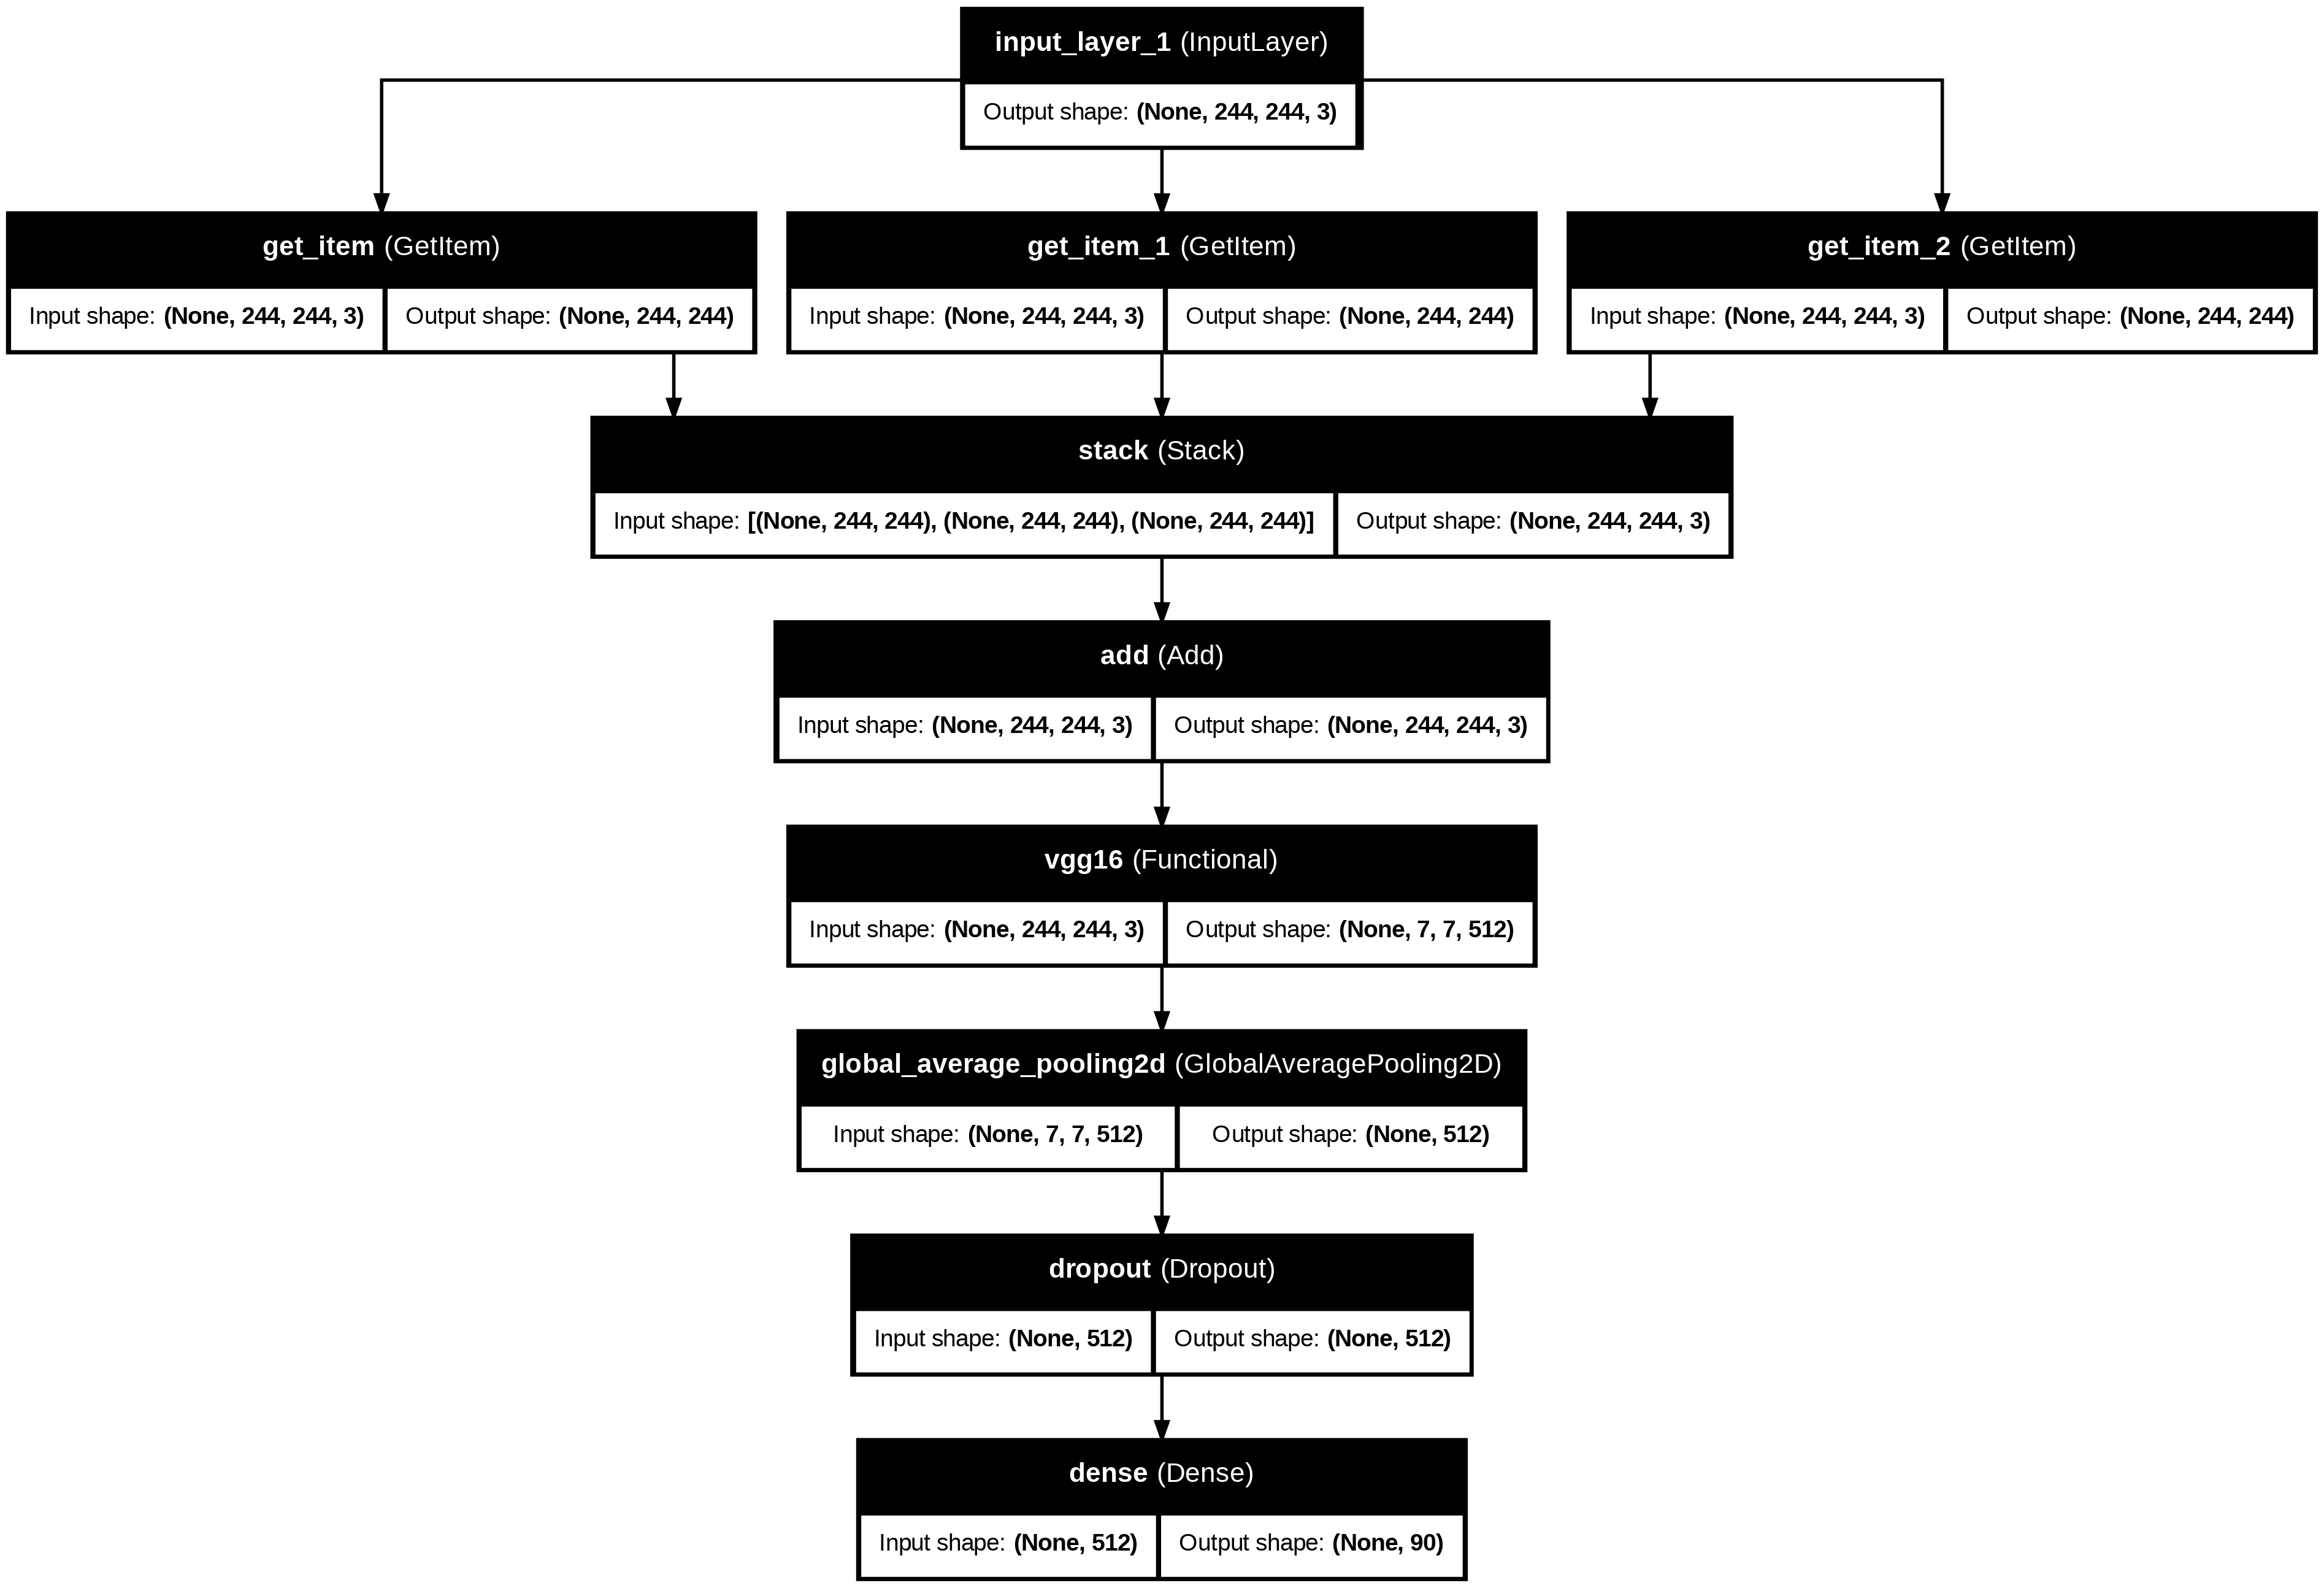

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 22.0 MB/s eta 0:00:00


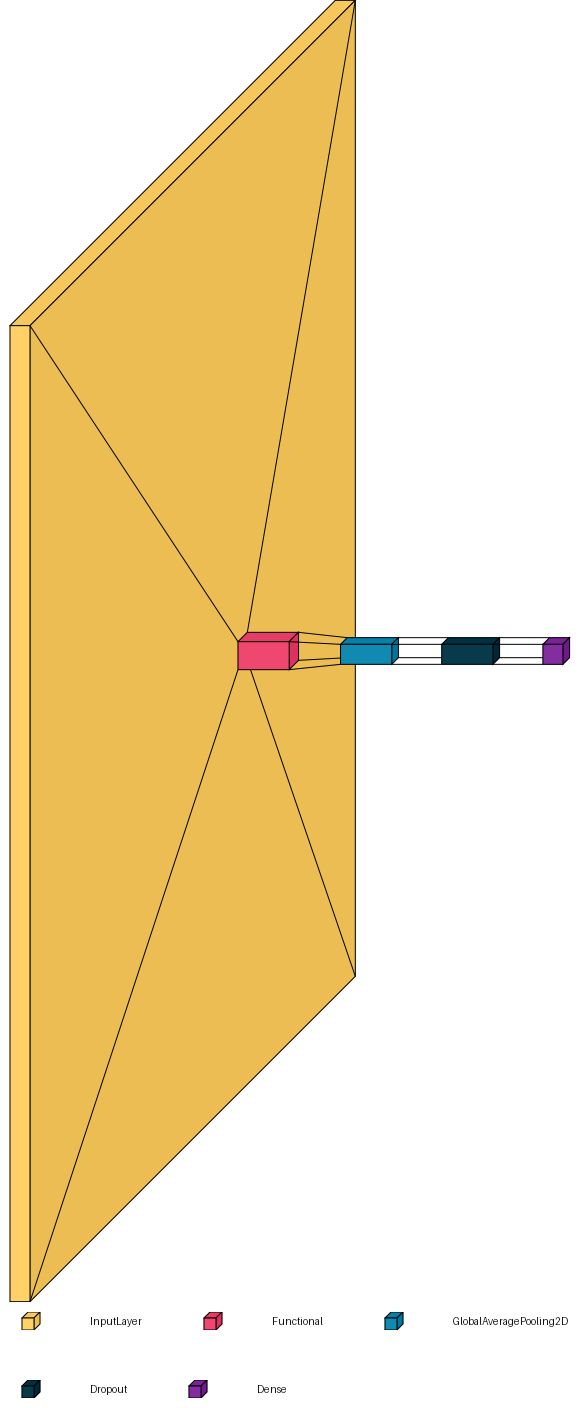

In [ ]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [ ]:
# fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 244, 244, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 244, 244, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 244, 244, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 90)             │         46,170 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,760,858 (56.31 MB)

 Trainable params: 7,125,594 (27.18 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        )
    ]
)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1548 - loss: 6.3577 - val_accuracy: 0.5763 - val_loss: 1.2647
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 489ms/step - accuracy: 0.6129 - loss: 1.2976 - val_accuracy: 0.6723 - val_loss: 1.1613
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.7349 - loss: 0.8251 - val_accuracy: 0.7684 - val_loss: 0.7922
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 512ms/step - accuracy: 0.8633 - loss: 0.4105 - val_accuracy: 0.8023 - val_loss: 0.7471
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 575ms/step - accuracy: 0.9172 - loss: 0.2955 - val_accuracy: 0.7797 - val_loss: 0.7260
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 520ms/step - accuracy: 0.9400 - loss: 0.2001 - val_accuracy: 0.7966 - val_loss: 0.7285
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 527ms/step - accuracy: 0.9516 - loss: 0.1495 - val_accuracy: 0.8192 - val_loss: 0.6992
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.9416 - loss: 0.2015 - val_accurac

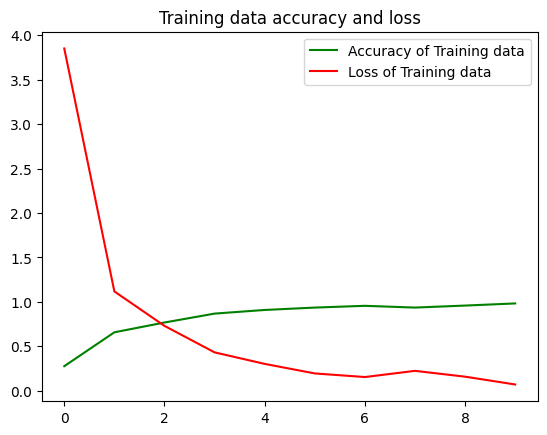

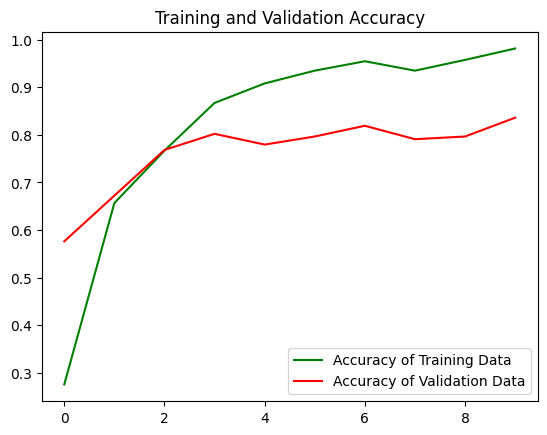

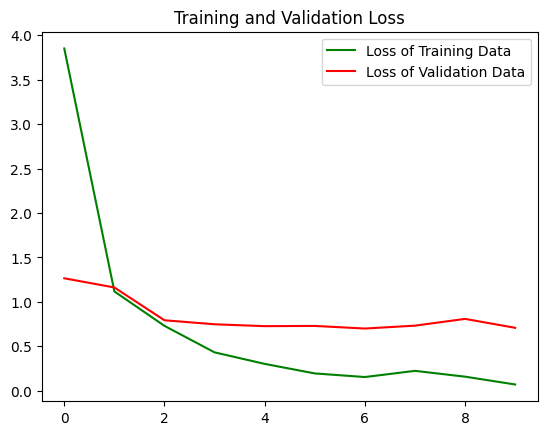

<Figure size 640x480 with 0 Axes>

In [ ]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

<a id="10"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Result Classification 📊📈</span>

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 725ms/step - accuracy: 0.8364 - loss: 0.7614
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


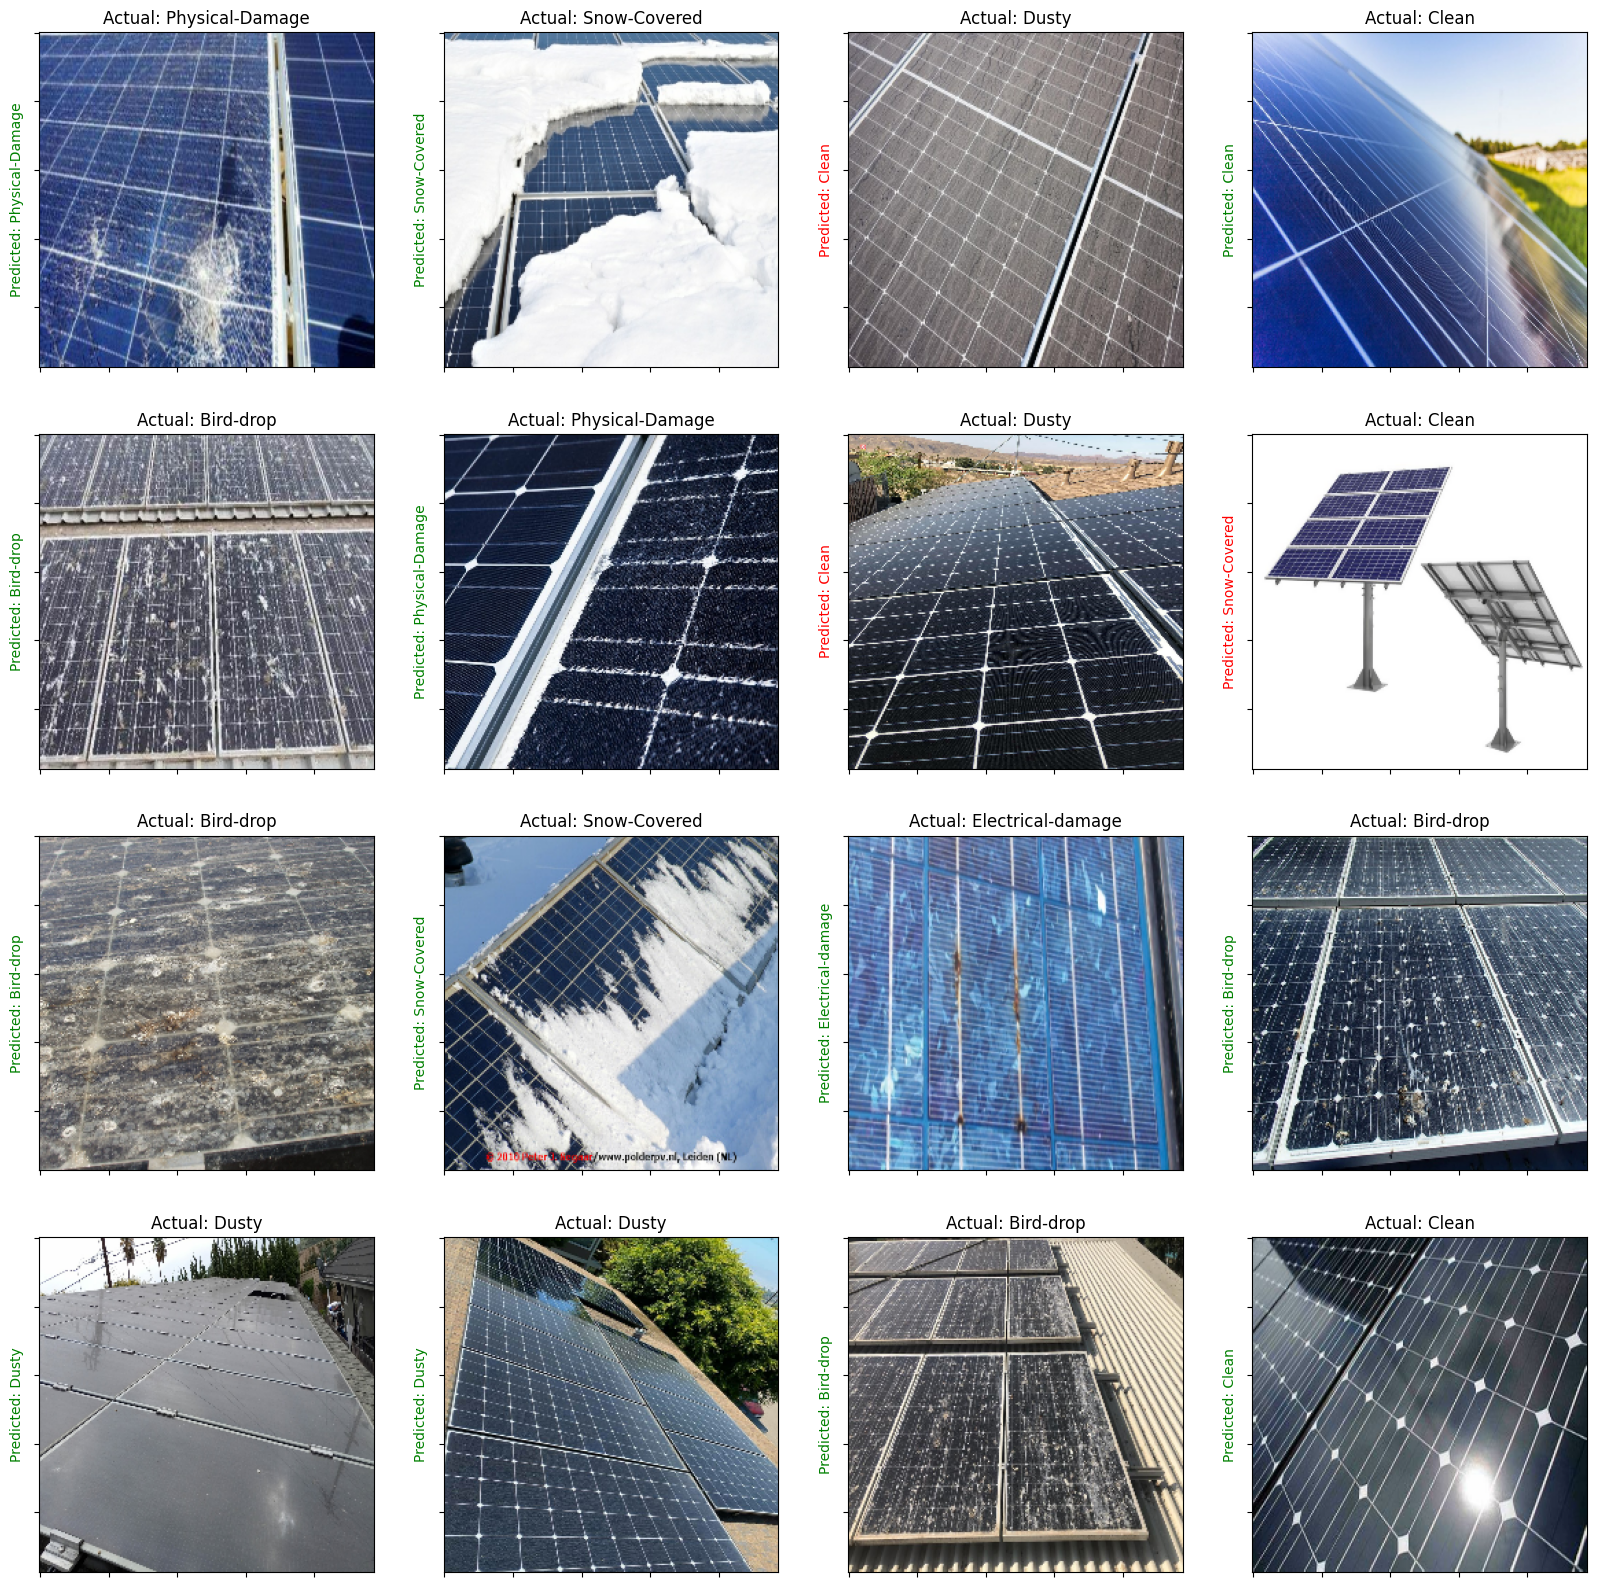

In [ ]:
loss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


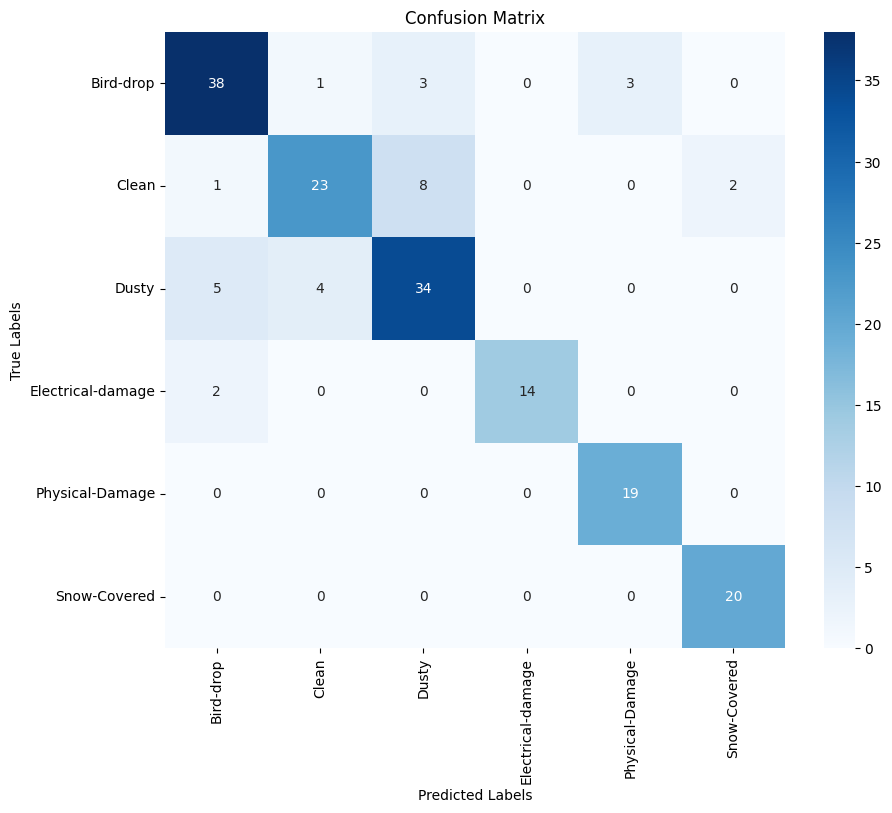

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    # Get true labels
    y_true.extend(labels.numpy())

    # Get predicted labels
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=-1)
    y_pred.extend(predicted_labels)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


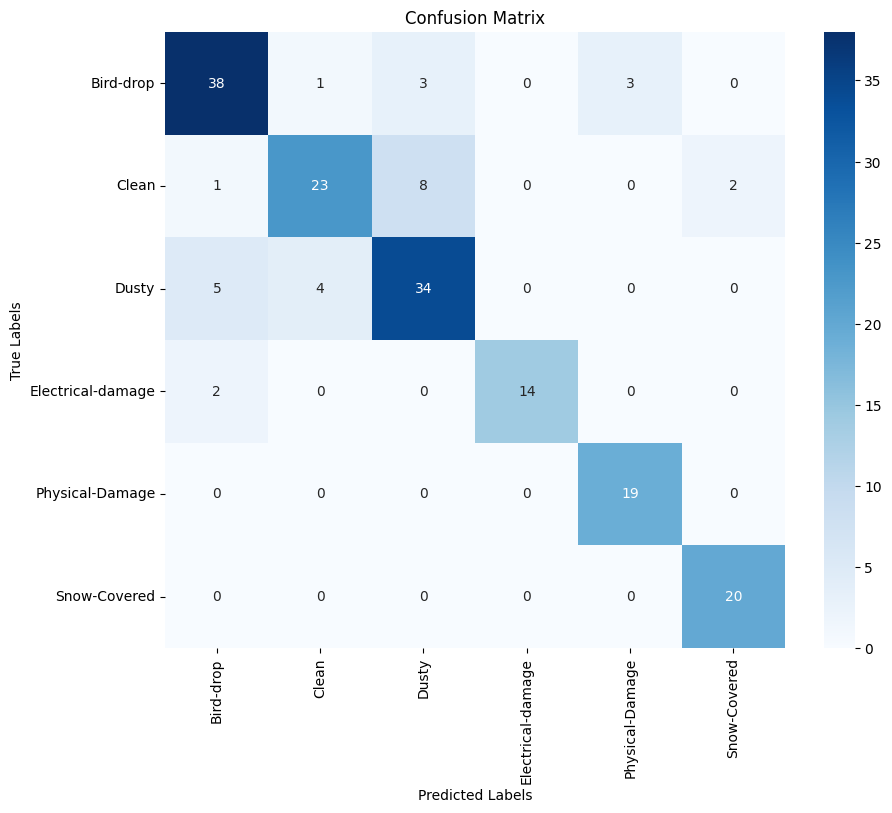

Overall Accuracy: 0.8362
Precision per class:  [0.82608696 0.82142857 0.75555556 1.         0.86363636 0.90909091]
Recall per class:  [0.84444444 0.67647059 0.79069767 0.875      1.         1.        ]
F1-score per class:  [0.83516484 0.74193548 0.77272727 0.93333333 0.92682927 0.95238095]
Average Precision: 0.8626
Average Recall: 0.8644
Average F1-score: 0.8604


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    # Get true labels
    y_true.extend(labels.numpy())

    # Get predicted labels
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=-1)
    y_pred.extend(predicted_labels)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Compute Precision, Recall, F1-Score for each class
precision = precision_score(y_true, y_pred, average=None)  # 'average=None' gives per-class precision
recall = recall_score(y_true, y_pred, average=None)        # 'average=None' gives per-class recall
f1 = f1_score(y_true, y_pred, average=None)                # 'average=None' gives per-class F1-score

# Compute Overall Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print all metrics
print(f'Overall Accuracy: {accuracy:.4f}')
print('Precision per class: ', precision)
print('Recall per class: ', recall)
print('F1-score per class: ', f1)

# If you want the average metrics (e.g., micro, macro, weighted), you can do:
precision_avg = precision_score(y_true, y_pred, average='macro')  # Average across classes
recall_avg = recall_score(y_true, y_pred, average='macro')
f1_avg = f1_score(y_true, y_pred, average='macro')

print(f'Average Precision: {precision_avg:.4f}')
print(f'Average Recall: {recall_avg:.4f}')
print(f'Average F1-score: {f1_avg:.4f}')
